# Aprendizaje Supervisado con Scikit-Learn - Día 1

Antes que nada, vamos a comprobar las versiones de las diferentes librerías que vamos a estar utilizando a lo largo de las clases:

In [1]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:05:27) 
[Clang 9.0.1 ]
pandas version: 0.25.3
matplotlib version: 3.1.2
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 7.10.1
scikit-learn version: 0.21.3


Por último, vamos a desactivar los mensajes de advertencia *`DeprecationWarnings`*, ya que no afectan en nada al código ni nuestros objetivos formativos para las clases:

In [2]:
# Importamos un filtro de warnings
from warnings import simplefilter
# Ignoramos los DeprecationWarnings, en concreto el del módulo six.py
simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

## Lab 0 - Datasets de ejemplo

Una de las mejores maneras de aprender es, en general, reducir la dimensionalidad de un problema hasta comprender las cuestiones básicas y desarrollar una *intuición*.

Ésta es una técnica muy utilizada en Ciencias Físicas, donde muchas veces se estudia un modelo unidimensional y luego se generaliza, con la ayuda de herramientas matemáticas, a $n$ dimensiones.

Aquí haremos lo mismo gracias a una serie de Datasets básicos que utilizaremos en conjunto con otros reales a lo largo del curso.

### Forge Dataset
Utilizaremos un dataset llamado *Forge* para algunos ejemplos de modelos de clasificación supervisada. He aquí el dataset:

Text(0, 0.5, 'característica 2')

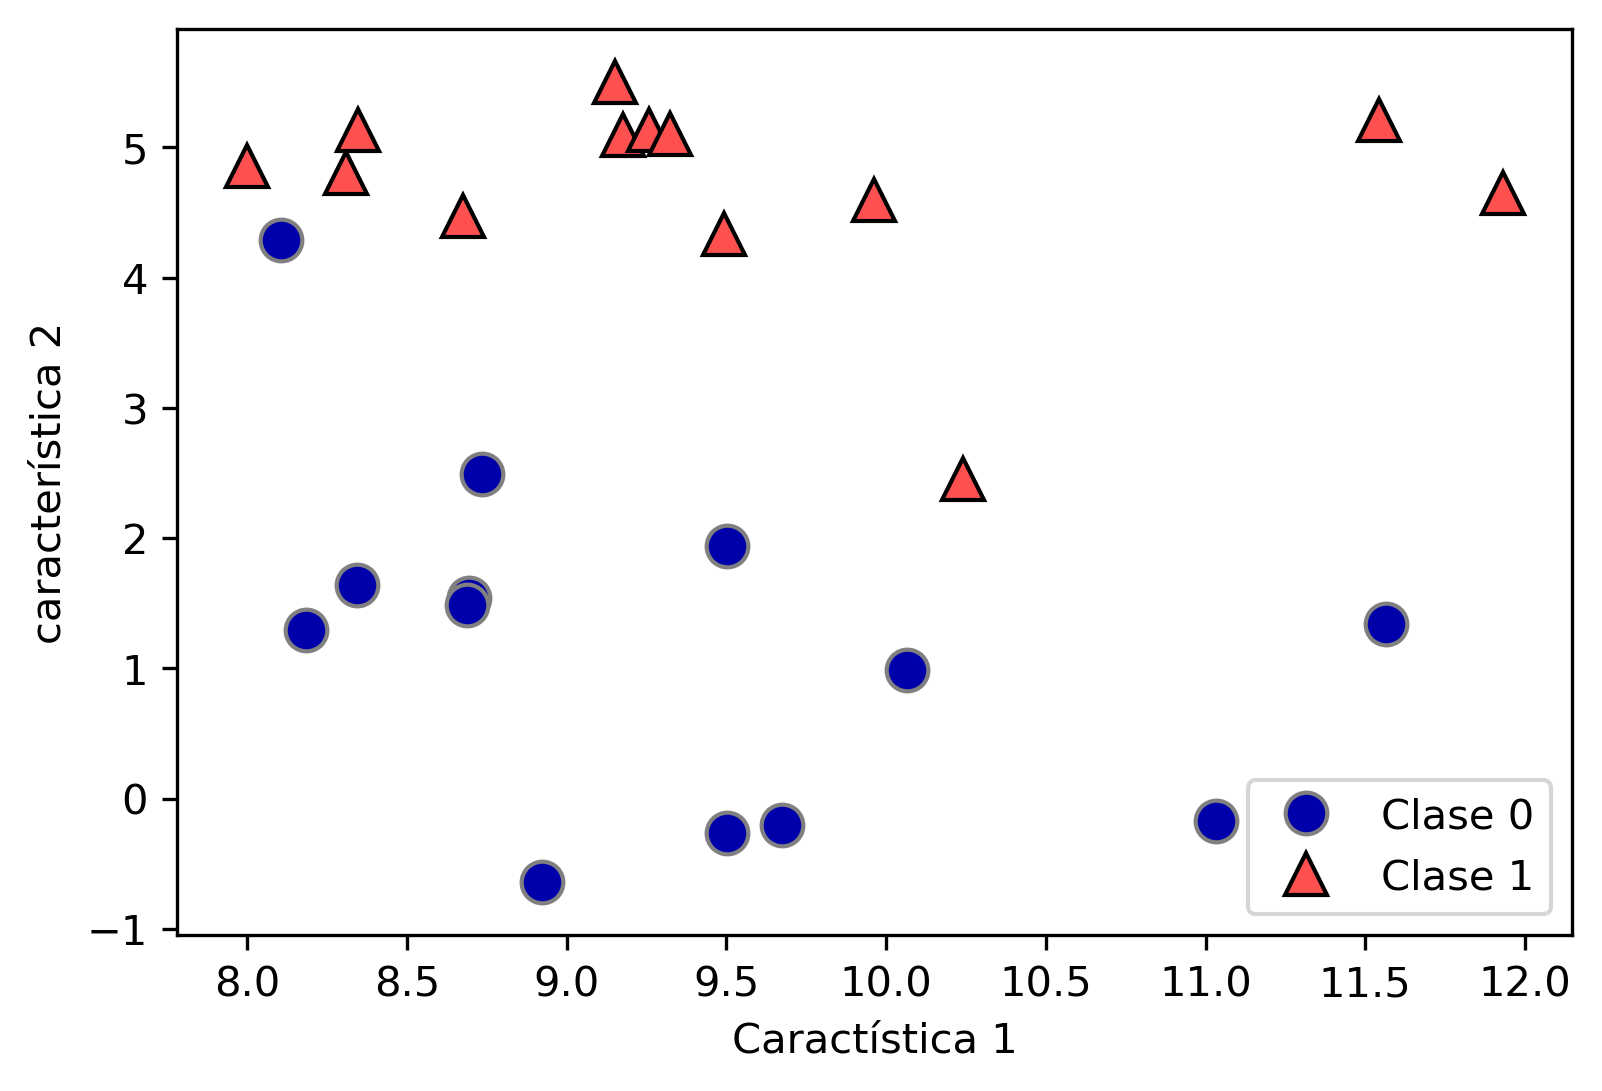

In [4]:
# Generamos un dataset
X, y = mglearn.datasets.make_forge() # Característica, Característica
# Lo pintamos
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Clase 0", "Clase 1"], loc=4)
plt.xlabel("Caractística 1")
plt.ylabel("característica 2")

¿Cuántos datapoints y características tiene este Dataset $X$? Utiliza Numpy para saber la respuesta, apóyate en el método `type()` de Python si necesitas saber qué métodos puedes utilizar sobre él, así como la combinación `Tab` y `Shift-Tab` para conocer la documentación de los diferentes métodos disponibles:

In [5]:
# Escribe la línea de código abajo
print("X.shape:", X.shape)

X.shape: (26, 2)


#### Dataset Wave

Utilizaremos otro dataset llamado *Wave* para los ejemplos básicos de regresión supervisada. Igualmente, utilizamos un dataset muy sencillo, de pocas dimensiones que nos ayude a visualizar y a desarrollar una intuición sobre nuestros modelos.

Text(0, 0.5, 'Objetivo')

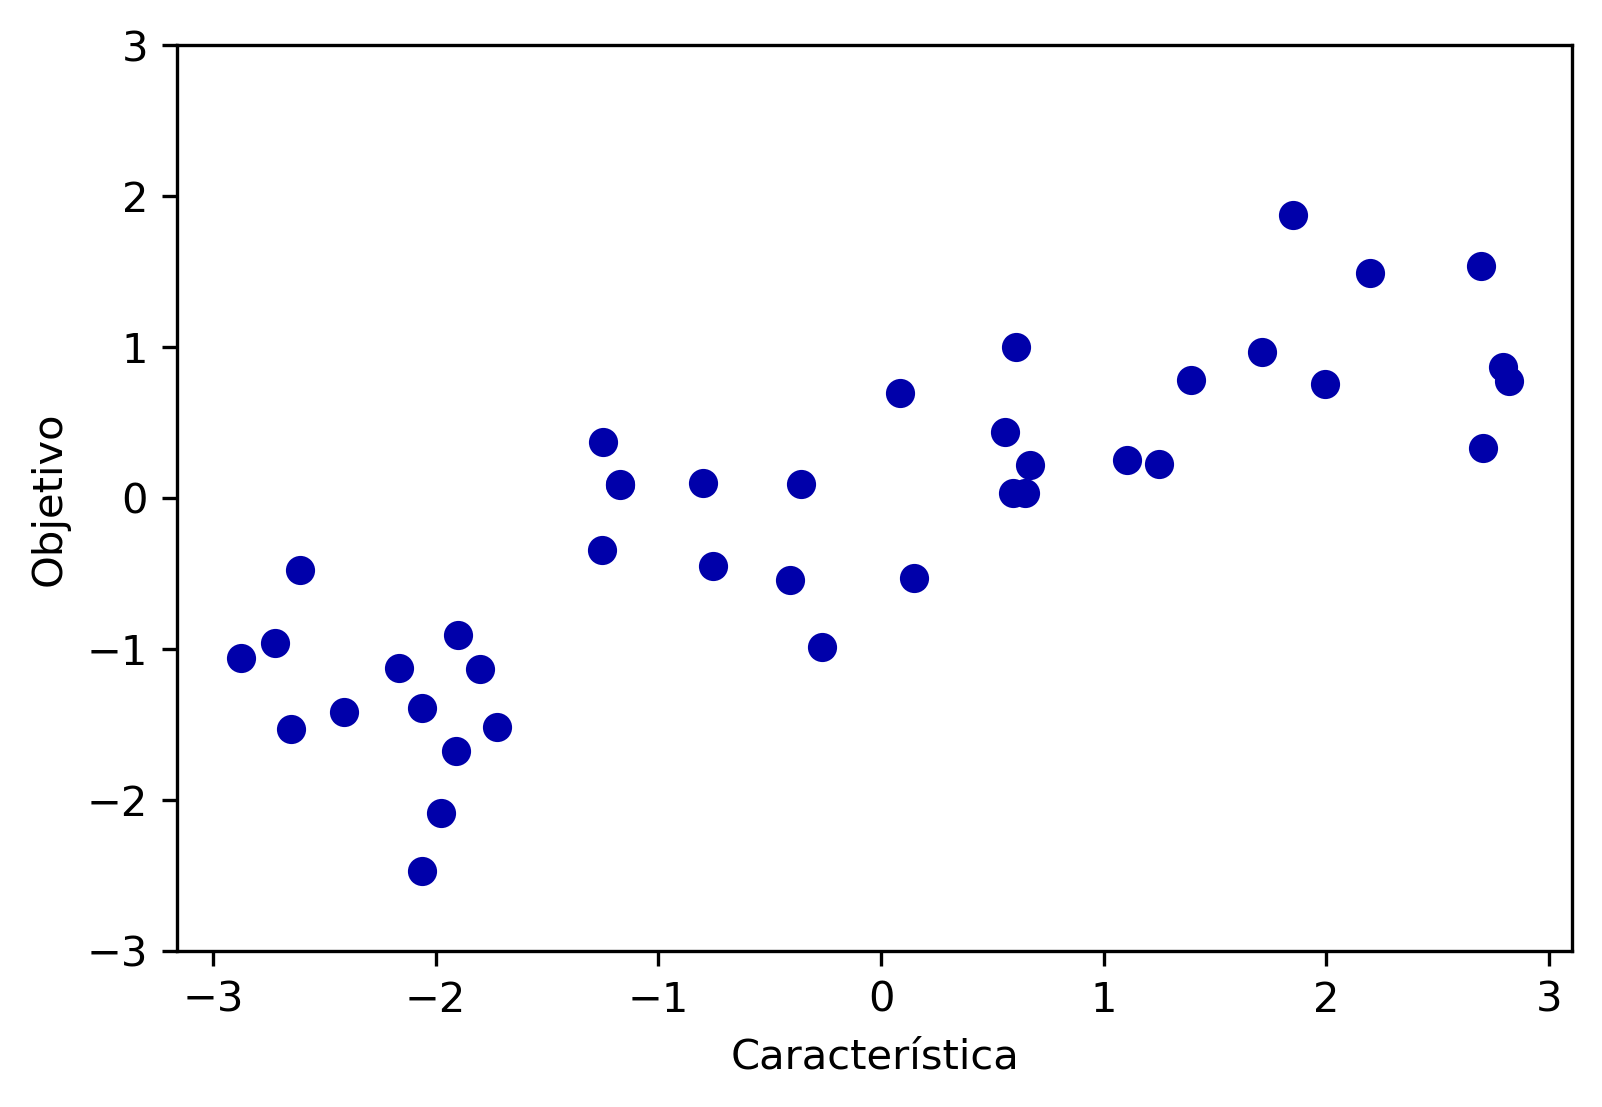

In [6]:
# Generamos un dataset
X, y = mglearn.datasets.make_wave(n_samples=40) #Inputs, Outputs
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Característica")
plt.ylabel("Objetivo")

#### Un ejemplo real: Wisconsin Breast Cancer Dataset
Scikit-learn incluye algunos datasets reales con el propósito de trabajar con ellos de manera más sencilla. Éstos se almacenan como objetos `Bunch`. Lo único que es necesario saber de estos objetos por el momento es que se comportan como diccionarios de Python, con el beneficio añadido de que los valores se pueden acceder con *dot notation*.

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
type(cancer)

sklearn.utils.Bunch

In [9]:
print("Dimensiones del dataset:", cancer.data.shape)

Dimensiones del dataset: (569, 30)


Cada tumor está etiquetado como *benigno* o *maligno*, y el objetivo será aprender a predecir en base a ciertas características del tejido si un tumor es benigno o maligno.

In [10]:
print("Conteo de muestras por clase:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Conteo de muestras por clase:
 {'malignant': 212, 'benign': 357}


Para obtener una descripción del significado de cada una de las características, podemos usar el atributo `feature_names`:

In [11]:
print("Nombres de las características:\n", cancer.feature_names)

Nombres de las características:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Otro ejemplo real: Boston Housing Dataset
El objetivo de este dataset es predecir el valor medio de las casas en varios barrios de Boston en la década de los '70 usando información como la tasa de criminalidad, proximidad al río Charles, acceso a autovías, etc.

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


A efectos de utilizar este dataset, es mejor complementarlo considerando no sólo las 13 características iniciales, sino todos los productos entre características (llamados también *interacciones*). La generación de interacciones la haremos incrementando el grado polinómico del dataset con el transformador de Scikit Learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) Además, modificaremos la escala de los datos para uniformizarla y poder utilizar el concepto de medida de los datos correctamente gracias al preprocesador [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de Scikit-Learn.

In [ ]:
# Definimos una función en Python para encapsular la ingeniería de características que vamos a realizar sobre el dataset

def load_extended_boston():
    boston = load_boston()
    X = boston.data
    # Aplicamos un MinMaxScaler para escalar las características bajo un mismo criterio
    X = MinMaxScaler().fit_transform(boston.data)
    # Finalmente, generamos interacciones entre las diferentes características.
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [13]:
X, y = load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## Lab 1 - k-Nearest Neighbors
### Clasificación k-NN

Usemos para empezar nuestro dataset *Forge*. Primero, separamos los datos en un set de training y de test para poder evaluar el rendimiento del modelo:

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Lo siguiente es importar e instanciar la clase. Aquí es donde podemos poner un número de vecinos, por ejemplo, 3:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Finalmente, entrenamos el modelo usando el juego de datos de entrenamiento. Esto implica almacenar el dataset para poder calcular los vecinos durante la predicción:

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))

Predicciones sobre el juego de pruebas: [1 0 1 0 1 0 0]


In [18]:
print("Precisión sobre el juego de pruebas: {:.2f}"
      .format(clf.score(X_test, y_test)))

Precisión sobre el juego de pruebas: 0.86


### Análisis de KNeighborsClassifier

Se puede ilustrar la predicción para todos los puntos en el plano $xy$. Se usan colores en el plano de acuero con la clase predicha para el punto en cuestión. Eso permite ver la frontera de decisión y desarrollar una cierta intuición sobre el modelo en función del número de vecinos.

En el siguiente código, se generan gráficas para valores de vecinos de 1, 3 y 9:

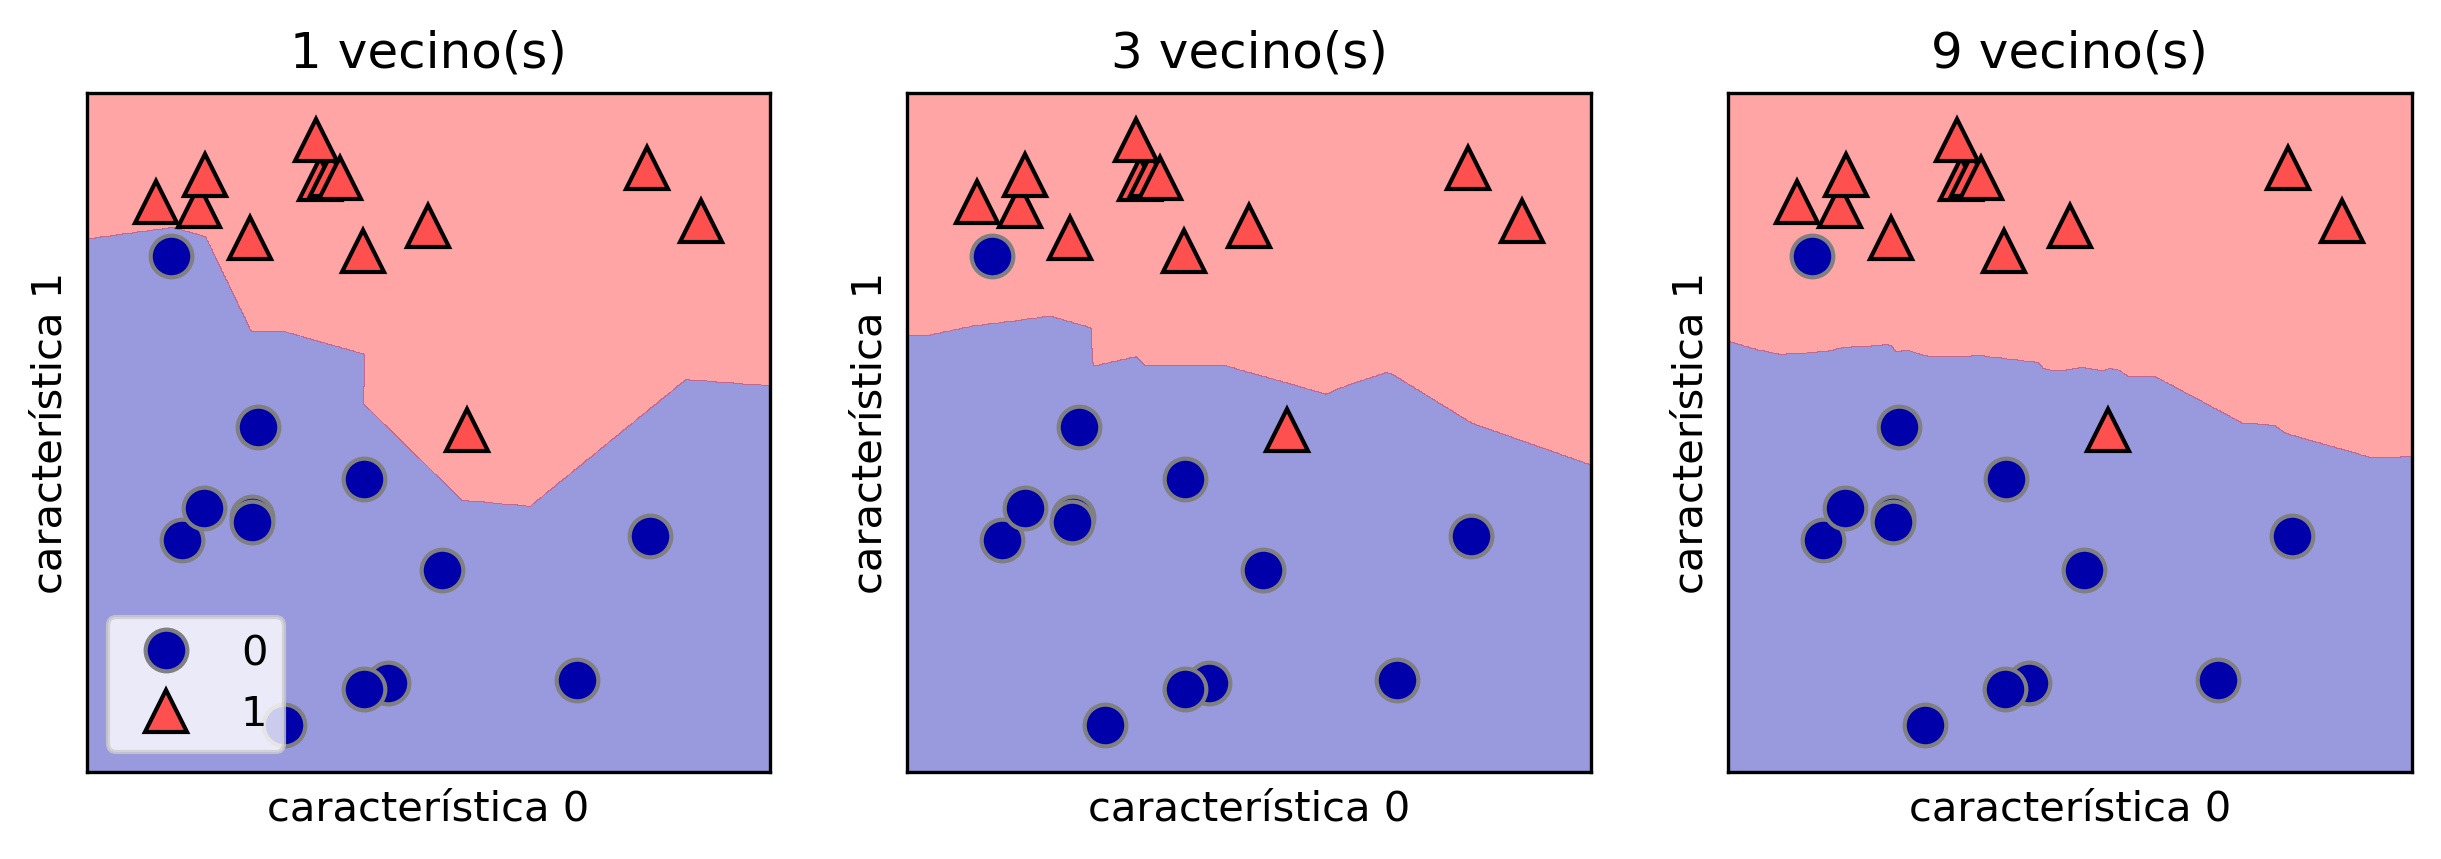

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

**Pregunta**: ¿qué diferencias observas en la frontera de clasificación y qué puede decirse del uso de varios vecinos frente al uso de uno sólo?

<font color='grey'>
Un sólo vecino hace que la frontera de decisión se ajuste mucho a los datos de entrenamiento. Si se incrementa el número de vecinos, la frontera se suaviza.
Esto implica que con un número bajo de vecinos, el modelo es más complejo, y con un número alto, menos. Yendo a un extremo, si $k=n$, donde n es el núermo de muestras del juego de entrenamiento, todos los puntos tendrían el mismo número de vecions y la predicción sería siempre la mism: la clase más frecuente en el juego de entrenamiento.

Vamos a evaluar ahora la conexión entre complejidad y generalización usando un dataset real (Breast Cancer Dataset):

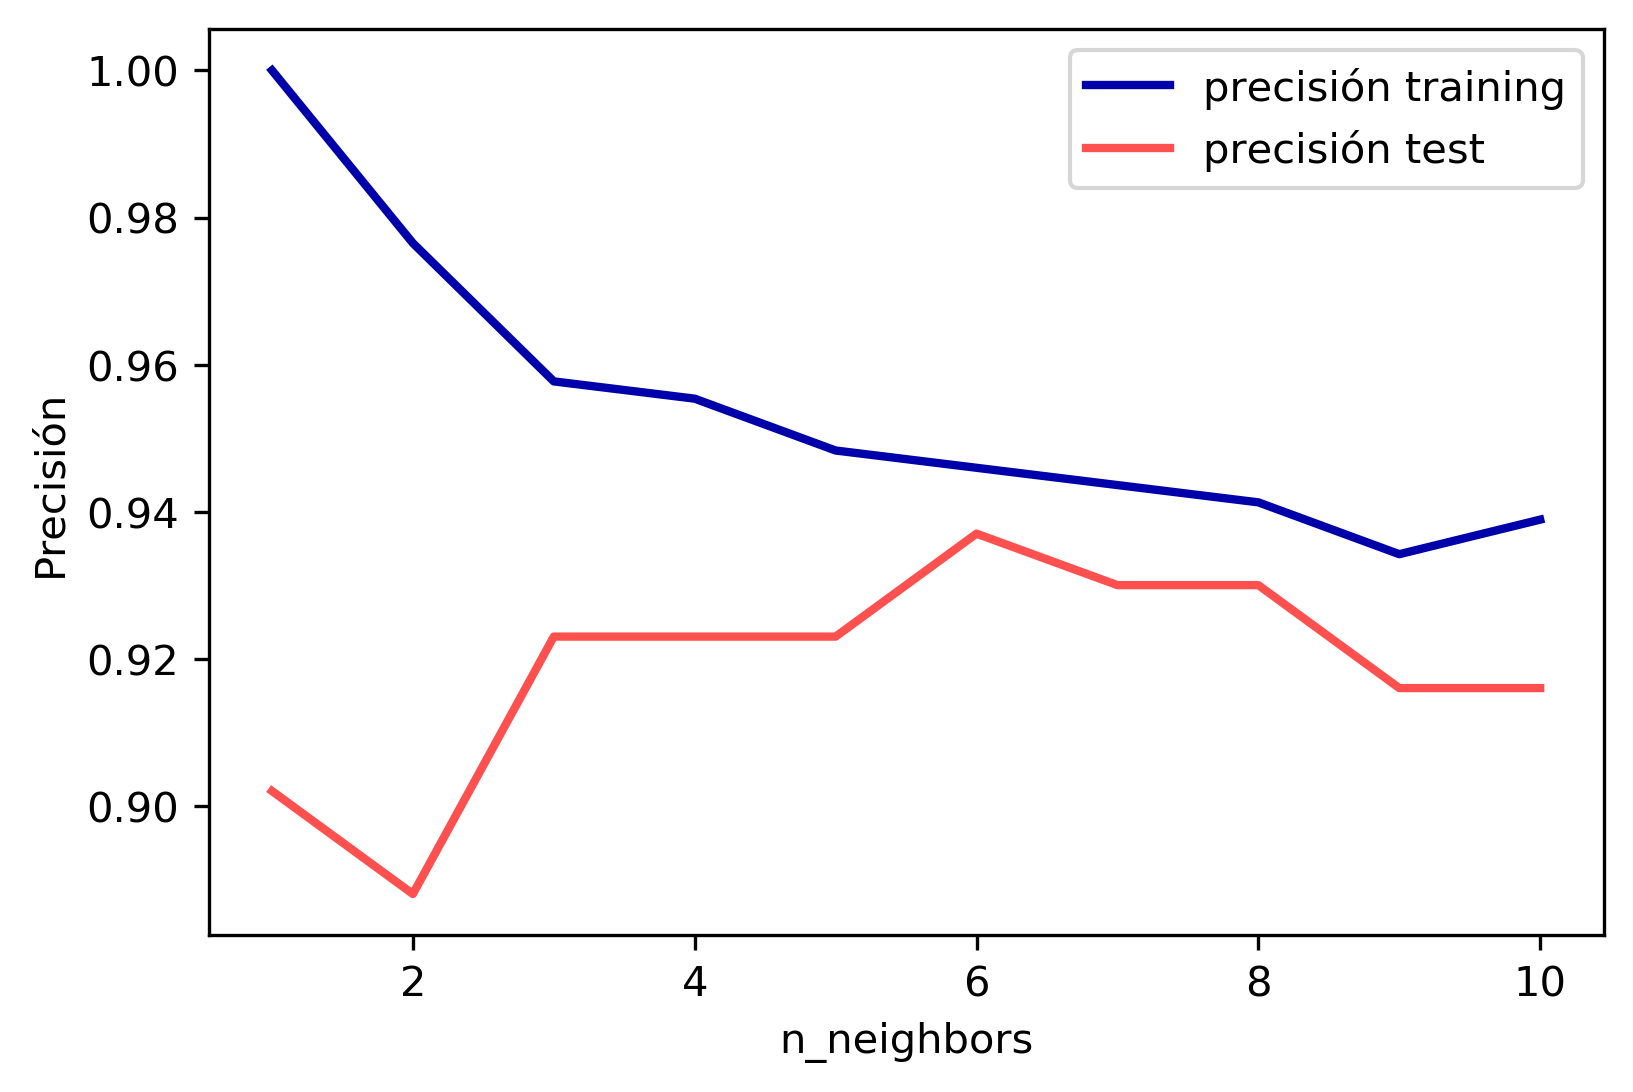

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train, y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,
         training_accuracy, label="precisión training")
plt.plot(neighbors_settings, test_accuracy, label="precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()

¿Reconoces las características de las curvas  de complejidad frente a precisión que vimos al principio? (Nótese que por el eje de ordenadas, la curva correspondiente al training set está invertida)

**¿Qué numero de vecinos es el mejor para obtener el mejor rendimiento del modelo?**

### Regresión k-NN
También hay una variante de regresión de k-Nearest Neighbors. De nuevo, comparemos el uso de un solo vecino frente a tres para ver la variación de las predicciones:

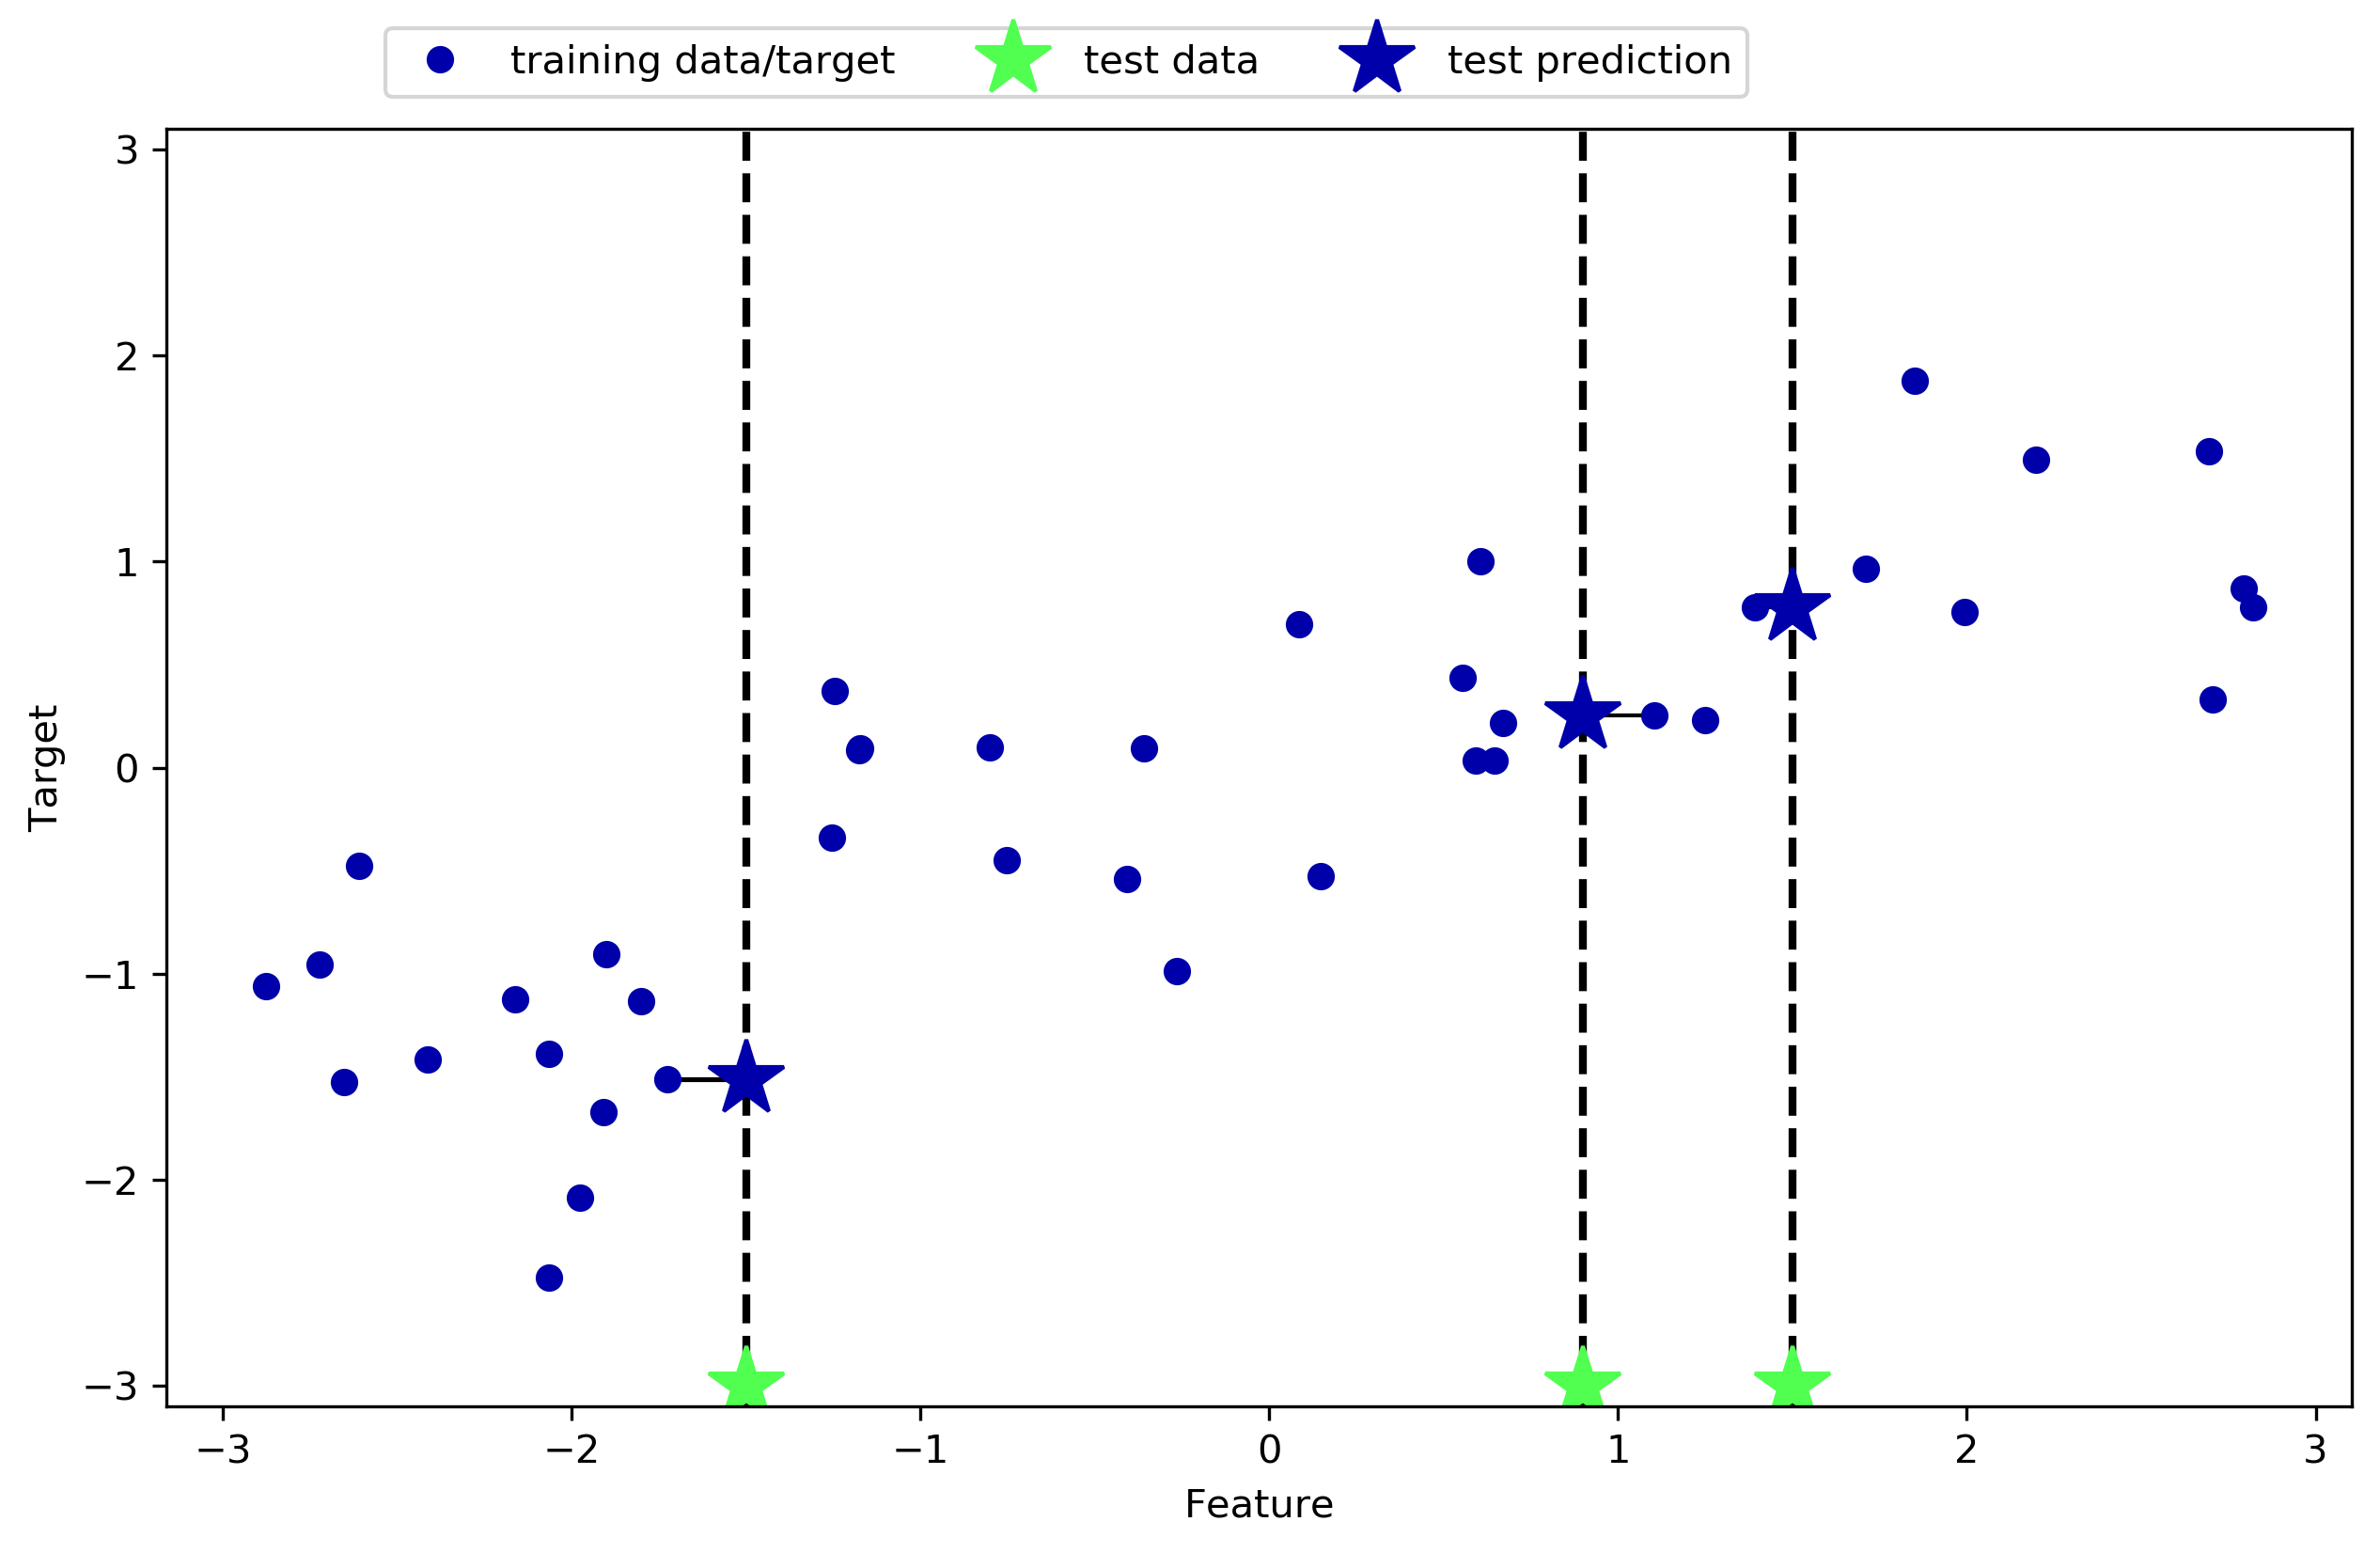

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

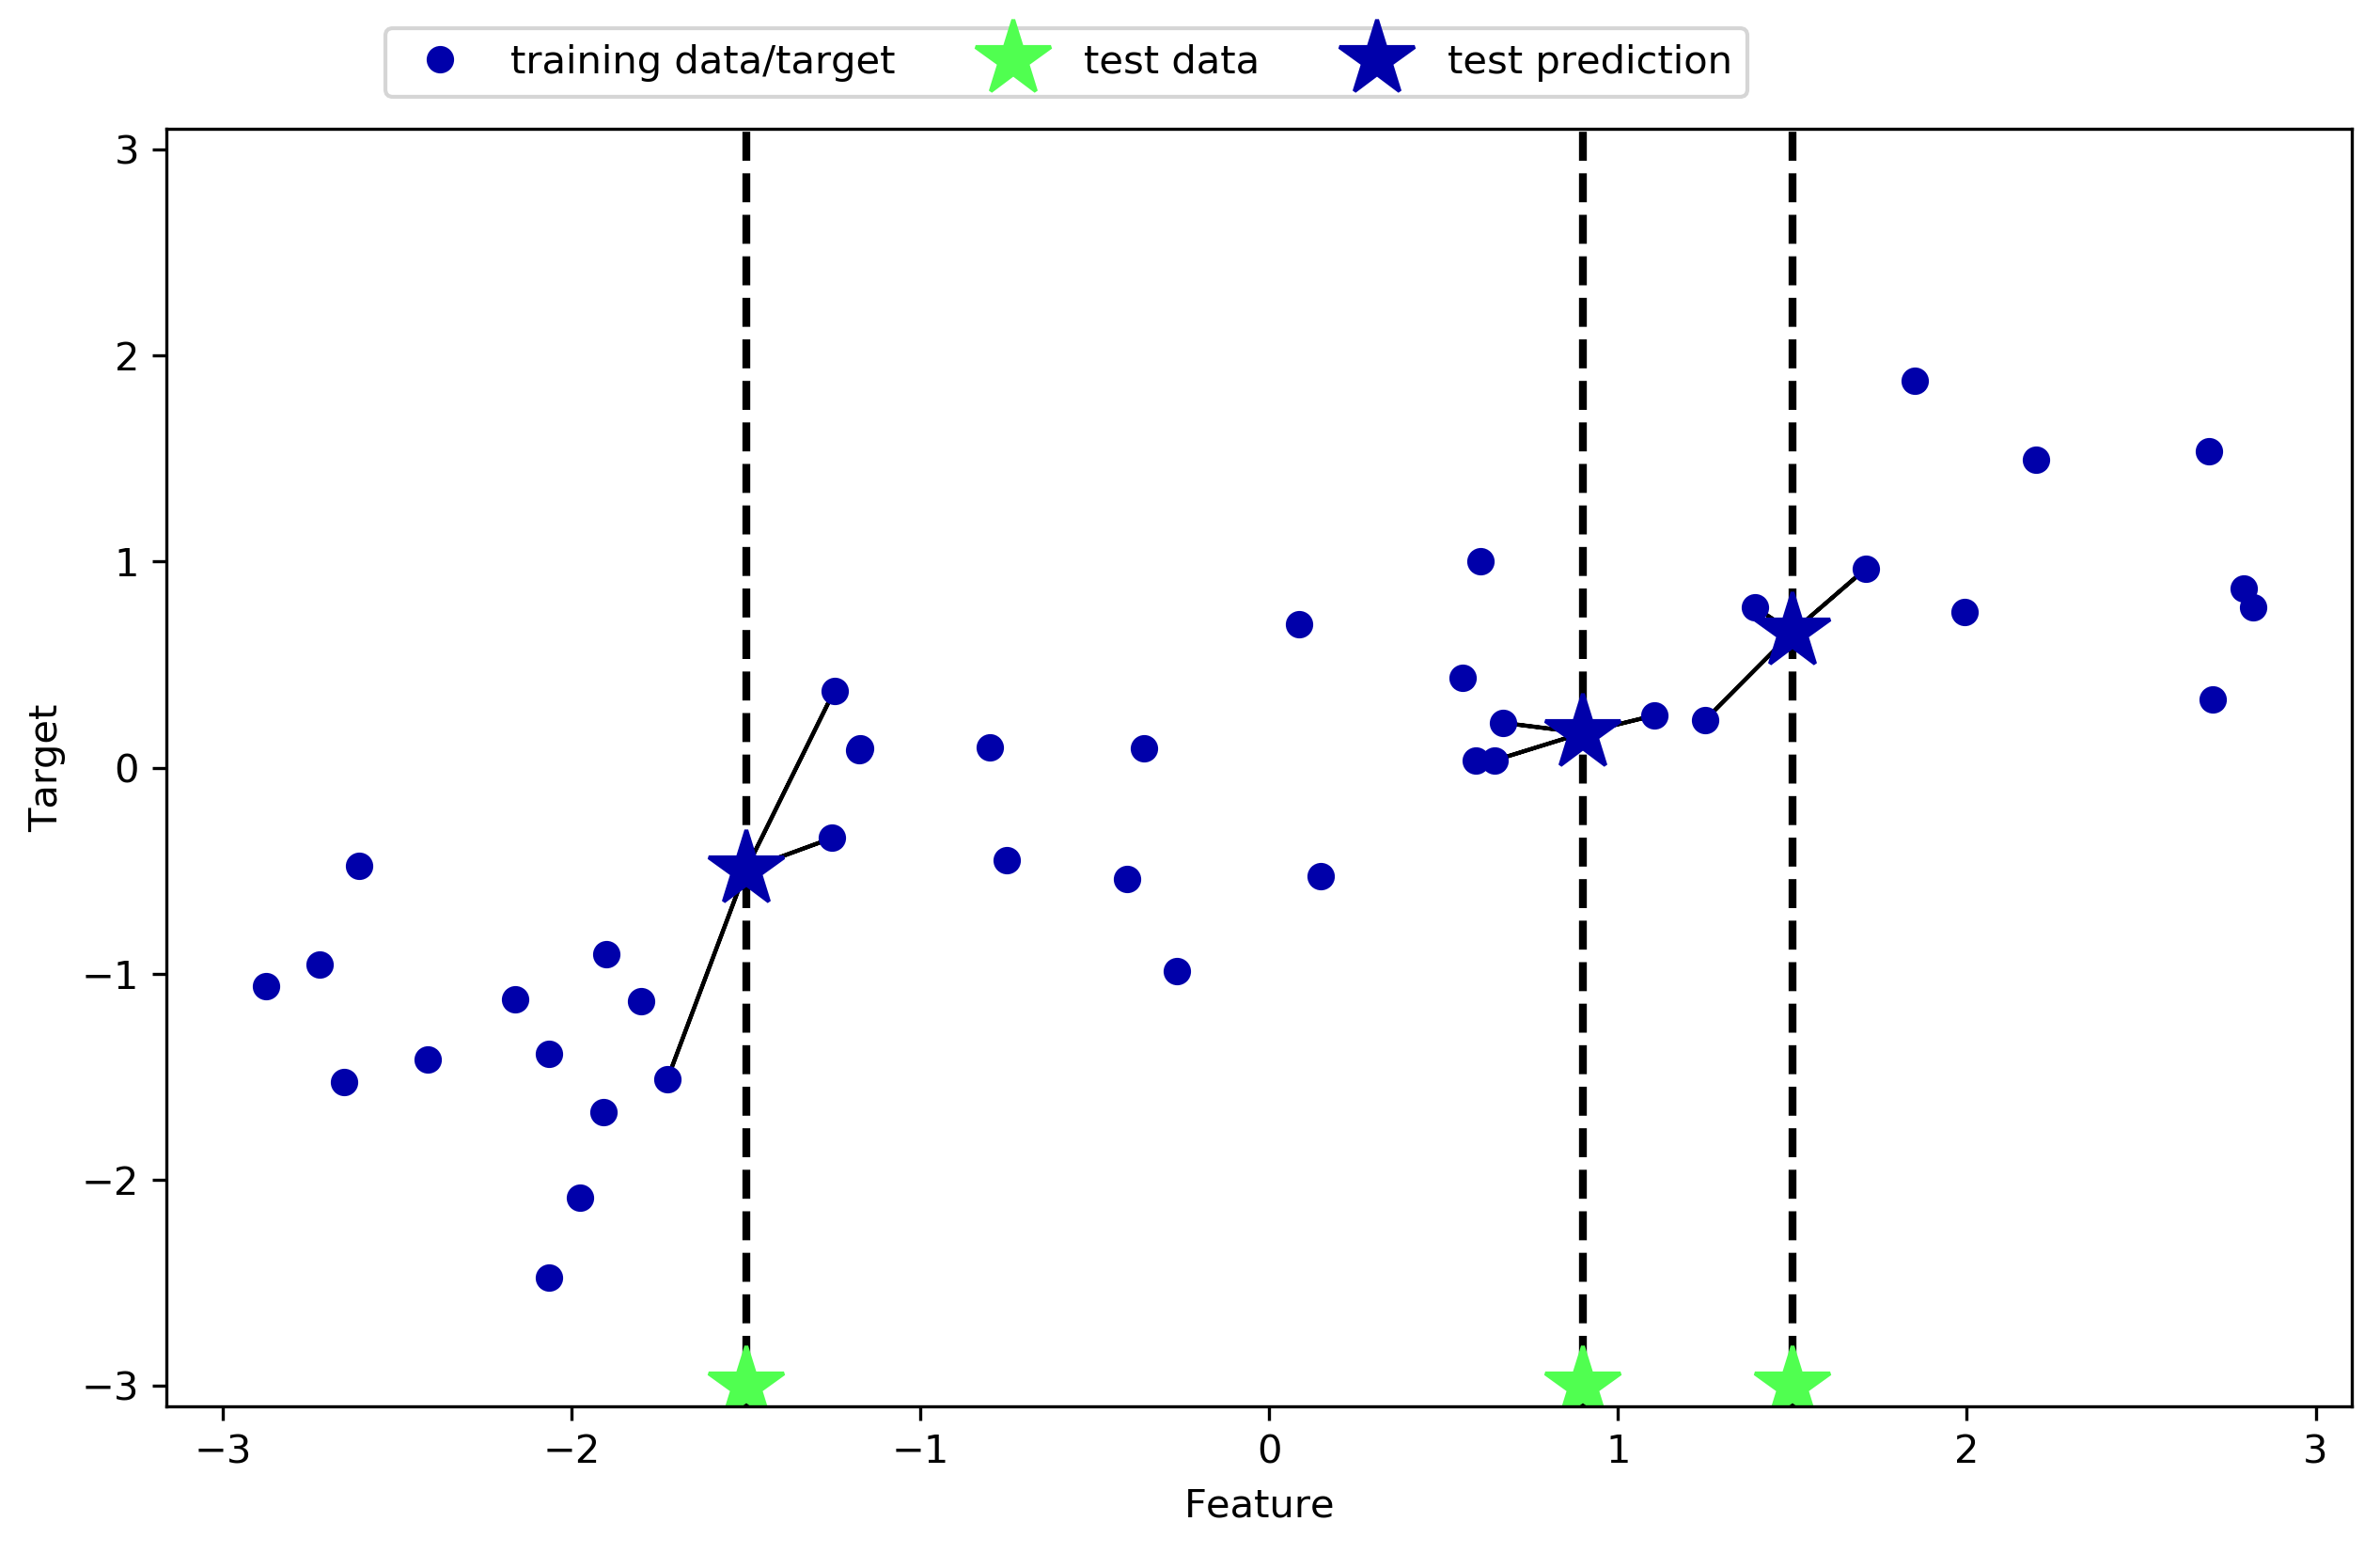

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

La implementación de kNN para regresión en Scikit-learn es muy parecida a su equivalente de clasificación. Lo hacemos aquí para el *Wave* dataset:

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Ajustamos el modelo usando los objetivo y datos de training
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [24]:
print("Predicciones sobre el test set:\n", reg.predict(X_test))

Predicciones sobre el test set:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


También podemos evaluar el modelo utilizando el método `score`, que para la regresión devuelve $R^2$ (el coeficiente de determinación, una medida de lo bueno que es un modelo de regresión que veremos en más detalle más adelante):

In [25]:
print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test, y_test)))

Coeficiente de determinación del test set: 0.83


### Análisis de KNeighborsRegressor

Para establecer el análisis, vamos a hacer una predicción de todos los posibles valores que puede tener la característica $x$ (donde $x\in[1,3000]$), y para ello creamos un dataset que tenga todos los puntos en una línea:

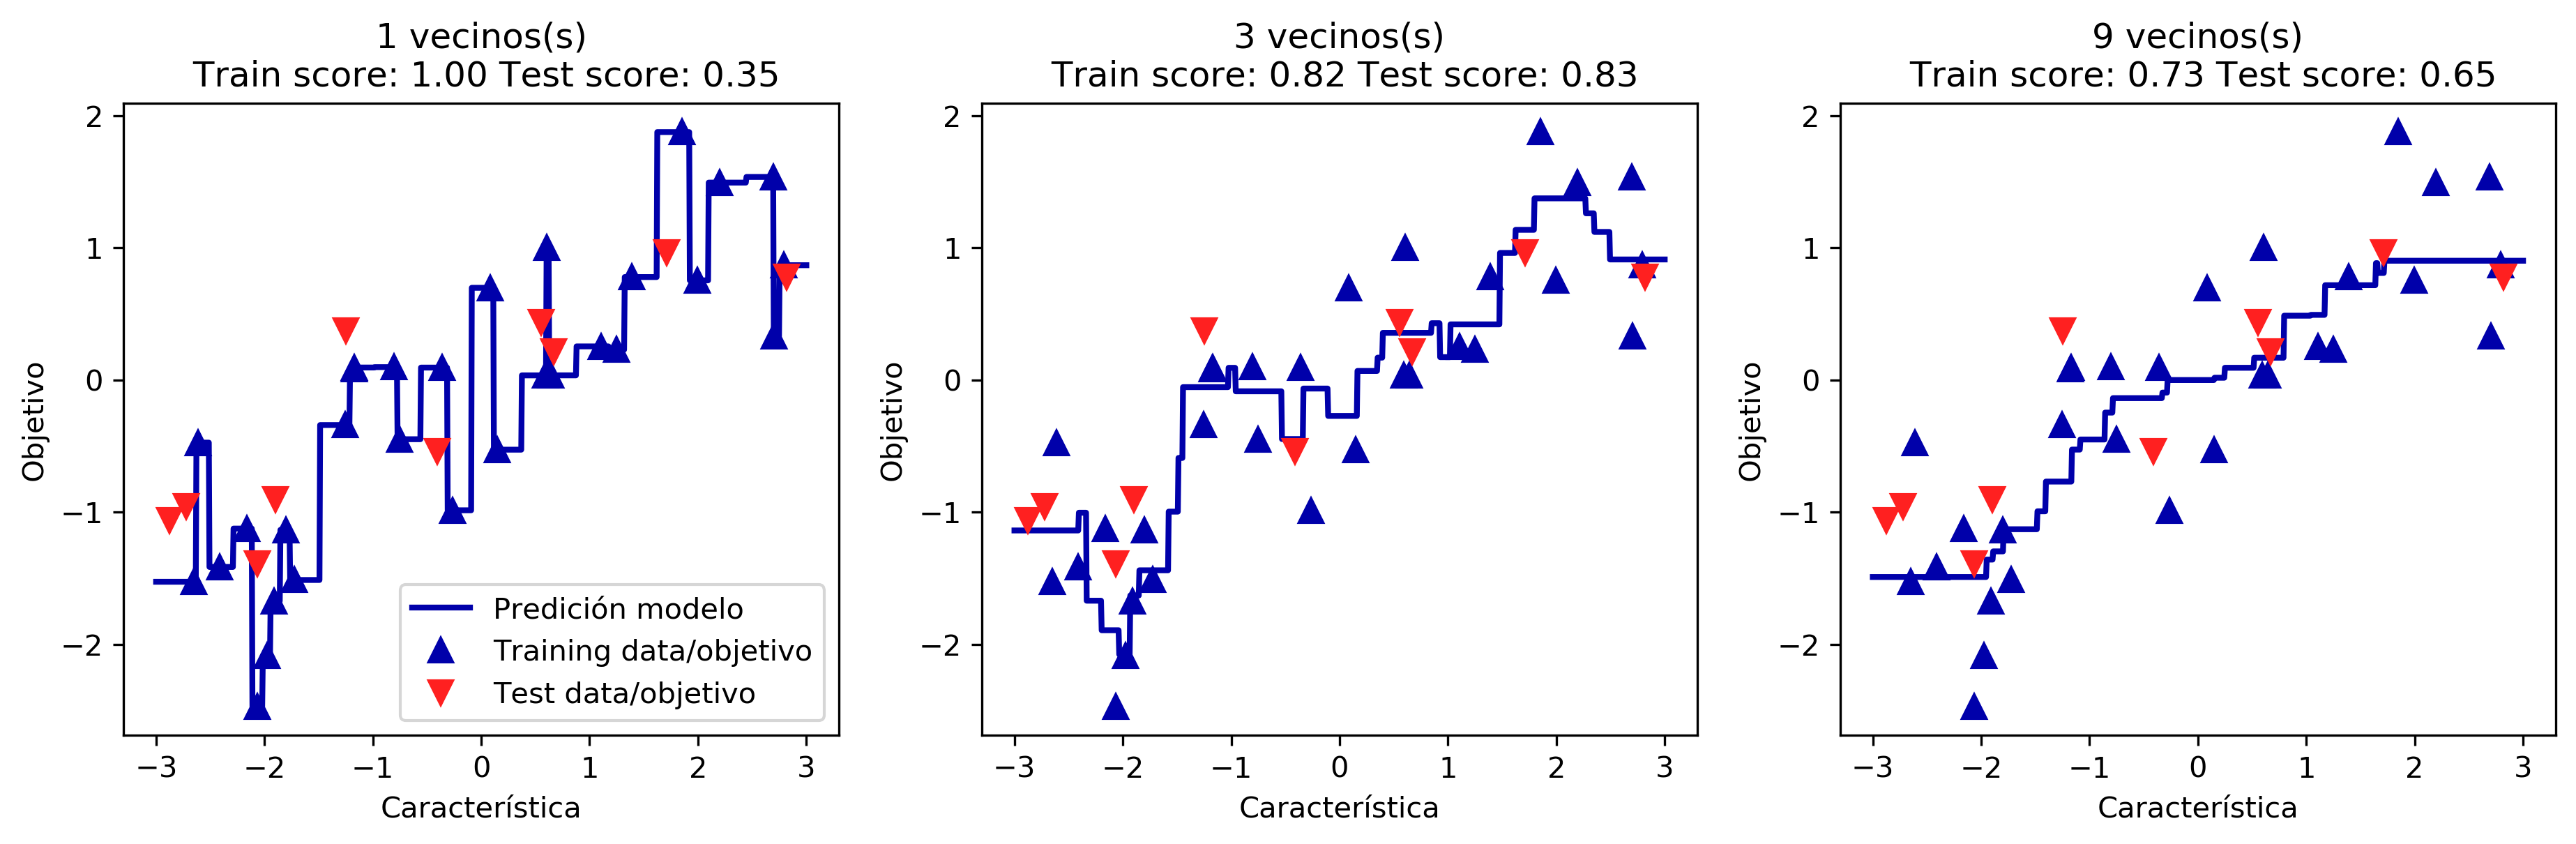

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Crear 1,000 data points, igualmente espaciados entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecinos(s)\n Train score: {:.2f} Test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
axes[0].legend(["Predición modelo", "Training data/objetivo",
                "Test data/objetivo"], loc="best")

Como ejercicio adicional con kNNs, ábrase el fichero [kNNs-Exercise.ipynb](kNNs-Exercise.ipynb)